## Digit Recognition from Image 

In [1]:
import cv2 as cv
from sklearn.externals import joblib
from skimage.feature import hog
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
clf, preproc = joblib.load('mnist_clf_svm.pkl')

In [3]:
img = cv.imread('image2.jpg')

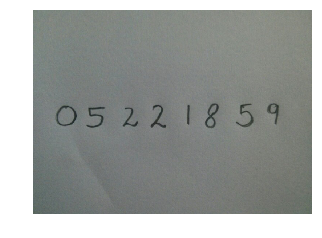

In [4]:
def show(image):
    plt.figure(figsize=(5, 5)) # size is in inches
    plt.axis('off')
    plt.imshow(image, interpolation='nearest', cmap='Greys_r') #nearest neighbour interpolation
    
show(cv.cvtColor(img, cv.COLOR_BGR2RGB))

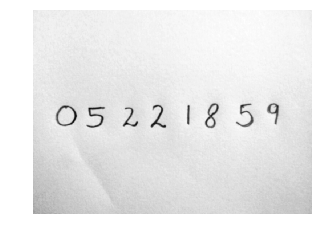

In [5]:
im_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
im_gray = cv.GaussianBlur(im_gray, (5,5), 0)
show(im_gray)

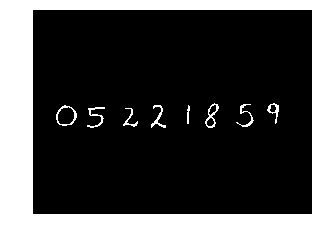

In [6]:
rt, im_th = cv.threshold(im_gray, 90, 255, cv.THRESH_BINARY_INV)
show(im_th)

In [7]:
_, contours, hier = cv.findContours(im_th.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
print(len(contours))

8


In [8]:
rects = [cv.boundingRect(ctr) for ctr in contours]
print(rects)

[(248, 268, 41, 52), (148, 266, 50, 57), (63, 262, 58, 57), (425, 261, 6, 53), (324, 260, 42, 63), (559, 257, 48, 64), (645, 256, 31, 58), (474, 256, 37, 68)]


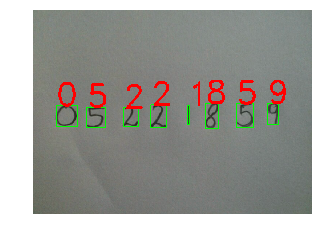

In [9]:
for rect in rects:
    cv.rectangle(img, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 2)
    leng = int(rect[3] * 1.6)
    pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
    pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
    roi = im_th[pt1:pt1+leng, pt2:pt2+leng]
    # Resize the image
    roi = cv.resize(roi, (28, 28), interpolation=cv.INTER_AREA)
    roi = cv.dilate(roi, (3, 3))
    # Calculate the HOG features
    roi_hog_fd = hog(roi, orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1), block_norm='L2')
    roi_hog_fd = preproc.transform(np.array([roi_hog_fd], 'float64'))
    # Pridict digit
    nbr = clf.predict(roi_hog_fd)
    cv.putText(img, str(int(nbr[0])), (rect[0], rect[1]),cv.FONT_HERSHEY_DUPLEX, 3, (255, 0, 0), 3)
    
show(img)